## Importing the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/sj-leshrac/Stock_Market_Data/master/NIFTY2010.csv'
dataset_train = pd.read_csv(url)


In [ ]:
training_set1=dataset_train[0:1258]
testing_set1=dataset_train[1258:]

In [ ]:
training_set = training_set1.iloc[:, 4:5].values
testing_set = testing_set1.iloc[:, 4:5].values

In [ ]:
training_set

array([[5222.75    ],
       [5148.5     ],
       [5124.899902],
       ...,
       [8174.600098],
       [8224.950195],
       [8353.099609]])

## Pre-preocessing the Dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.1524129 ],
       [0.13573519],
       [0.13043423],
       ...,
       [0.81544458],
       [0.826754  ],
       [0.85553837]])

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
len(y_train)

1198

## LSTM Implementation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

from tensorflow.python.framework import ops
ops.reset_default_graph()

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0277
Epoch 2/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0048
Epoch 3/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0045
Epoch 4/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0043
Epoch 5/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0042
Epoch 6/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0042
Epoch 7/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0040
Epoch 9/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0039
Epoch 10/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0040
Epoch 13/100


In [ ]:
dataset_test = testing_set1
real_stock_price = dataset_test.iloc[:, 4:5].values

## Predicting the Output

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(61, 1252):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Visualizing the Output

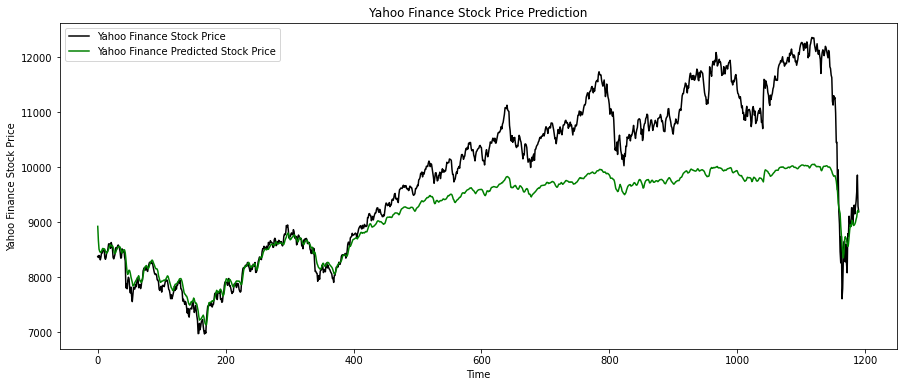

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

plt.plot(real_stock_price, color = 'black', label = 'Yahoo Finance Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Yahoo Finance Predicted Stock Price')
plt.title('Yahoo Finance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Yahoo Finance Stock Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_set_rmse = (np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price)))
test_set_r2 = r2_score(real_stock_price, predicted_stock_price)

In [ ]:
print(test_set_rmse)

979.8454167922998


In [ ]:
print(test_set_r2)

0.5395431877052288
